In [376]:
import tensorflow as tf

import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [377]:
PATH = './Images'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, '')

In [378]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [379]:
batch_size = 128
epochs = 16
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [380]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(
  directory = train_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
val_data_gen = validation_image_generator.flow_from_directory(
  directory = validation_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
test_data_gen = test_image_generator.flow_from_directory(
  directory = test_dir,
  classes = ['test'],
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
  shuffle = False
)

Found 79 images belonging to 7 classes.
Found 79 images belonging to 7 classes.
Found 13 images belonging to 1 classes.


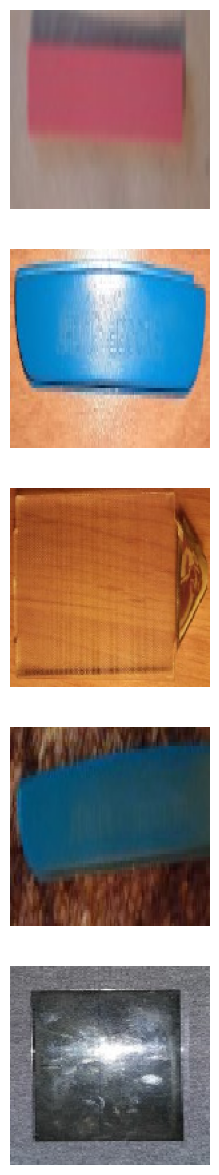

In [381]:
def plotImages(images_arr, probabilities = False, labels = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax, label in zip( images_arr, probabilities, axes, labels):
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{label} - {(probability*100)}")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Found 79 images belonging to 7 classes.


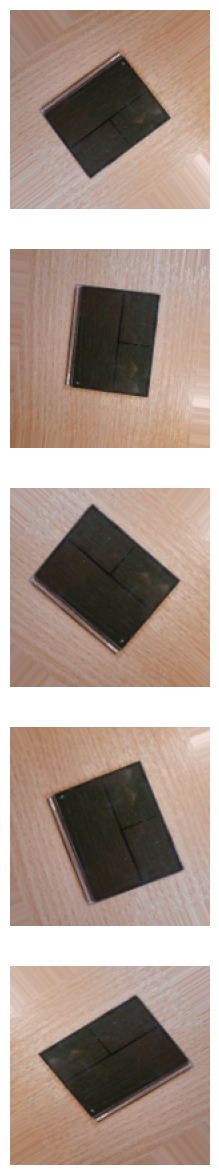

In [382]:
train_image_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 90,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = [0.9, 1.1],
    shear_range = 0.2
)
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [383]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))
    

Found 79 images belonging to 7 classes.


In [388]:
"""
model = Sequential()
model.add(Conv2D(128, (6,6), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(4,4))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7))
"""
model = Sequential()
model.add(Conv2D(128, (6,6), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, input_dim=784))
model.add(Dense(64, input_dim=784))
model.add(Dense(7, activation='softmax'))

model.build(input_shape = [IMG_HEIGHT, IMG_WIDTH])
model.summary()


Model: "sequential_118"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_112 (Conv2D)         (None, 150, 150, 128)     13952     
                                                                 
 max_pooling2d_109 (MaxPooli  (None, 75, 75, 128)      0         
 ng2D)                                                           
                                                                 
 flatten_51 (Flatten)        (None, 720000)            0         
                                                                 
 dense_116 (Dense)           (None, 128)               92160128  
                                                                 
 dense_117 (Dense)           (None, 64)                8256      
                                                                 
 dense_118 (Dense)           (None, 7)                 455       
                                                    

In [389]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False,
                                                    label_smoothing=0.0,
                                                    axis=-1),
    metrics = ['accuracy']
    )

In [390]:
history = model.fit(
    x = train_data_gen,
    epochs = epochs,
    batch_size = batch_size,
    steps_per_epoch = 1,
    validation_data = val_data_gen,
    validation_steps = 1
    )

Epoch 1/16
1/1 [==============================] - 4s 4s/step - loss: 1.9000 - accuracy: 0.2785 - val_loss: 329.1463 - val_accuracy: 0.3165
Epoch 2/16
1/1 [==============================] - 3s 3s/step - loss: 325.0663 - accuracy: 0.3165 - val_loss: 93.4589 - val_accuracy: 0.2532
Epoch 3/16
1/1 [==============================] - 3s 3s/step - loss: 93.5004 - accuracy: 0.2405 - val_loss: 89.7383 - val_accuracy: 0.1266
Epoch 4/16
1/1 [==============================] - 3s 3s/step - loss: 89.9321 - accuracy: 0.1266 - val_loss: 17.9601 - val_accuracy: 0.2532
Epoch 5/16
1/1 [==============================] - 3s 3s/step - loss: 17.5194 - accuracy: 0.2785 - val_loss: 16.9066 - val_accuracy: 0.3924
Epoch 6/16
1/1 [==============================] - 3s 3s/step - loss: 16.5400 - accuracy: 0.4051 - val_loss: 12.1554 - val_accuracy: 0.4051
Epoch 7/16
1/1 [==============================] - 3s 3s/step - loss: 11.5287 - accuracy: 0.3924 - val_loss: 6.1031 - val_accuracy: 0.4051
Epoch 8/16
1/1 [===========

1/1 [==============================] - 0s 169ms/step


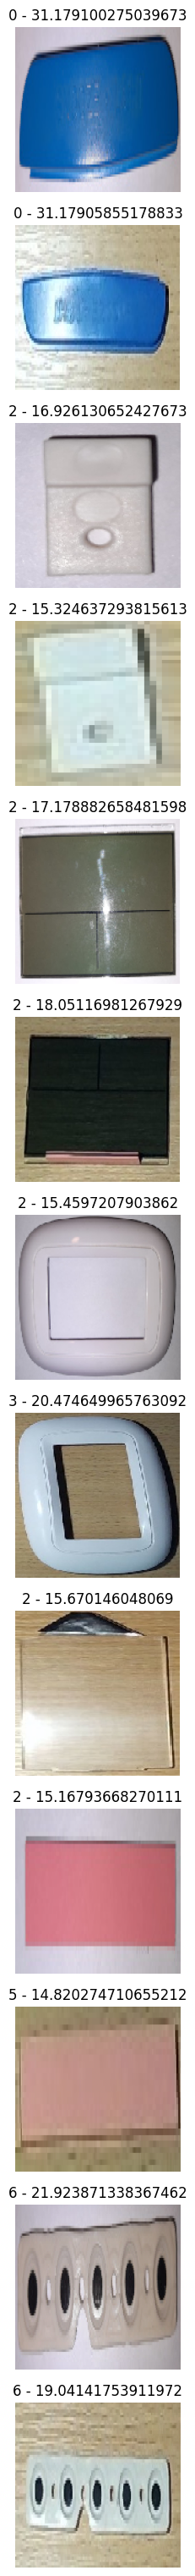

In [391]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data_gen)

test_images, _ = next(test_data_gen)


predictionPercent = []
predictionLabel = []

for i in range(len(predictions)):
    value = 0
    category = 0
    for j in range(len(predictions[i])):
        if predictions[i][j] > value:
            value = predictions[i][j]
            category = j
    predictionPercent.append(value)
    predictionLabel.append(category)

plotImages(test_images, predictionPercent, predictionLabel)
